In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import seaborn as sns
import kagglehub
import xgboost as xgb

/home/martim/Traive/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [2]:
# Download latest version
path = kagglehub.dataset_download("neuromusic/avocado-prices")

destination_folder = "./data"
# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move all files from source to destination
for filename in os.listdir(path):
    source_file = os.path.join(path, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.move(source_file, destination_file)

df = pd.read_csv('data/avocado.csv')

In [3]:
df = df.drop(columns = 'Unnamed: 0')

In [4]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

## Columns in the Dataset

- **Date**: The date of the observation
- **AveragePrice**: The average price of a single avocado
- **type**: Conventional or organic
- **year**: The year
- **Region**: The city or region of the observation
- **Total Volume**: Total number of avocados sold
- **4046**: Total number of avocados with PLU 4046 sold
- **4225**: Total number of avocados with PLU 4225 sold
- **4770**: Total number of avocados with PLU 4770 sold

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [37]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [32]:
df.describe()

Date  AveragePrice  Total Volume  \
count                          18249  18249.000000  1.824900e+04   
mean   2016-08-13 23:30:43.498273792      1.405978  8.506440e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2015-10-25 00:00:00      1.100000  1.083858e+04   
50%              2016-08-14 00:00:00      1.370000  1.073768e+05   
75%              2017-06-04 00:00:00      1.660000  4.329623e+05   
max              2018-03-25 00:00:00      3.250000  6.250565e+07   
std                              NaN      0.402677  3.453545e+06   

               4046          4225          4770    Total Bags    Small Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    8.540700e+02  3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03   
50%    8.645300e+03  2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04   
75%    1.110202e+05  1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04   
max    2.274362e+07  2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07   
std    1.264989e+06  1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05   

         Large Bags    XLarge Bags          year  
count  1.824900e+04   18249.000000  18249.000000  
mean   5.433809e+04    3106.426507   2016.147899  
min    0.000000e+00       0.000000   2015.000000  
25%    1.274700e+02       0.000000   2015.000000  
50%    2.647710e+03       0.000000   2016.000000  
75%    2.202925e+04     132.500000   2017.000000  
max    5.719097e+06  551693.650000   2018.000000  
std    2.439660e+05   17692.894652      0.939938

In [33]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

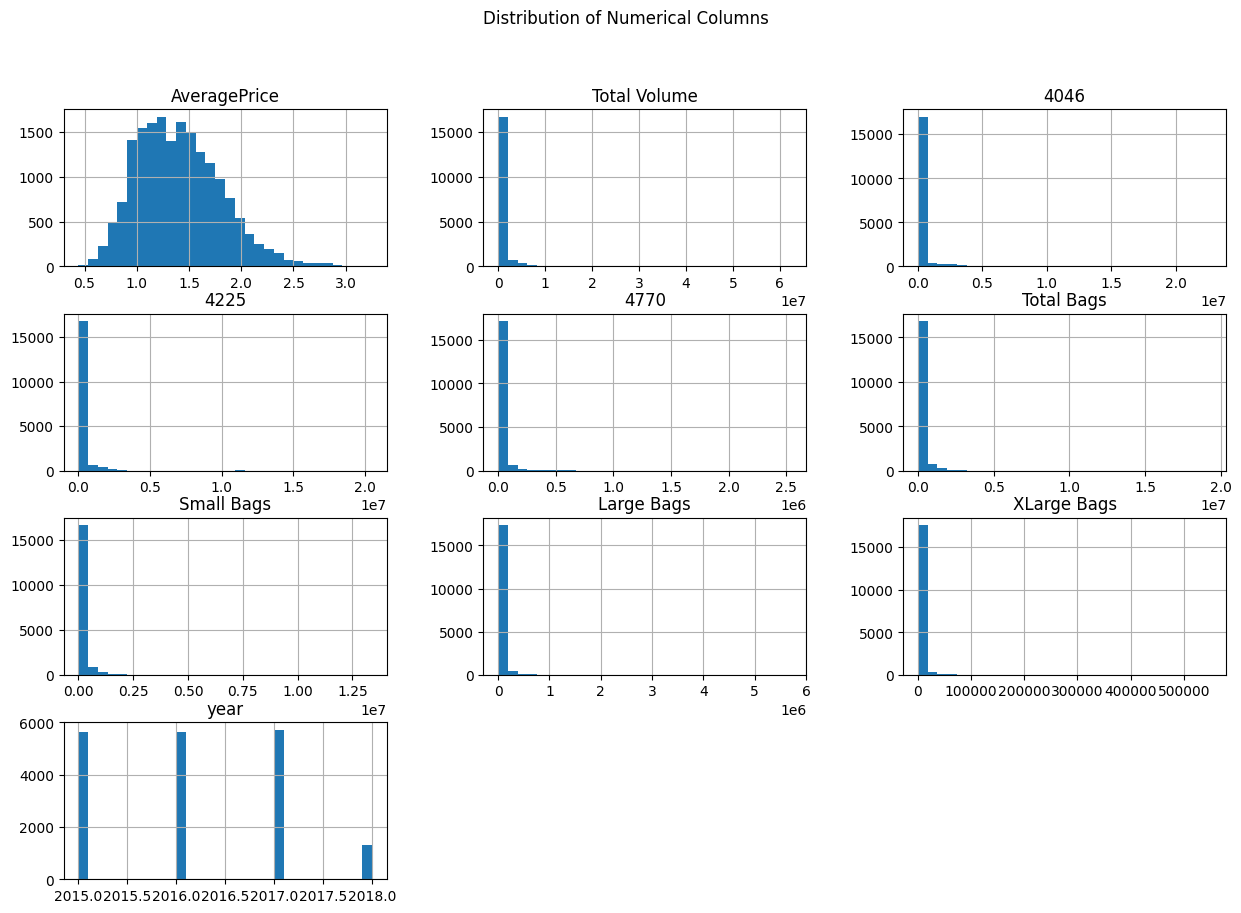

In [34]:
# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numerical Columns')
plt.show()

In [41]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

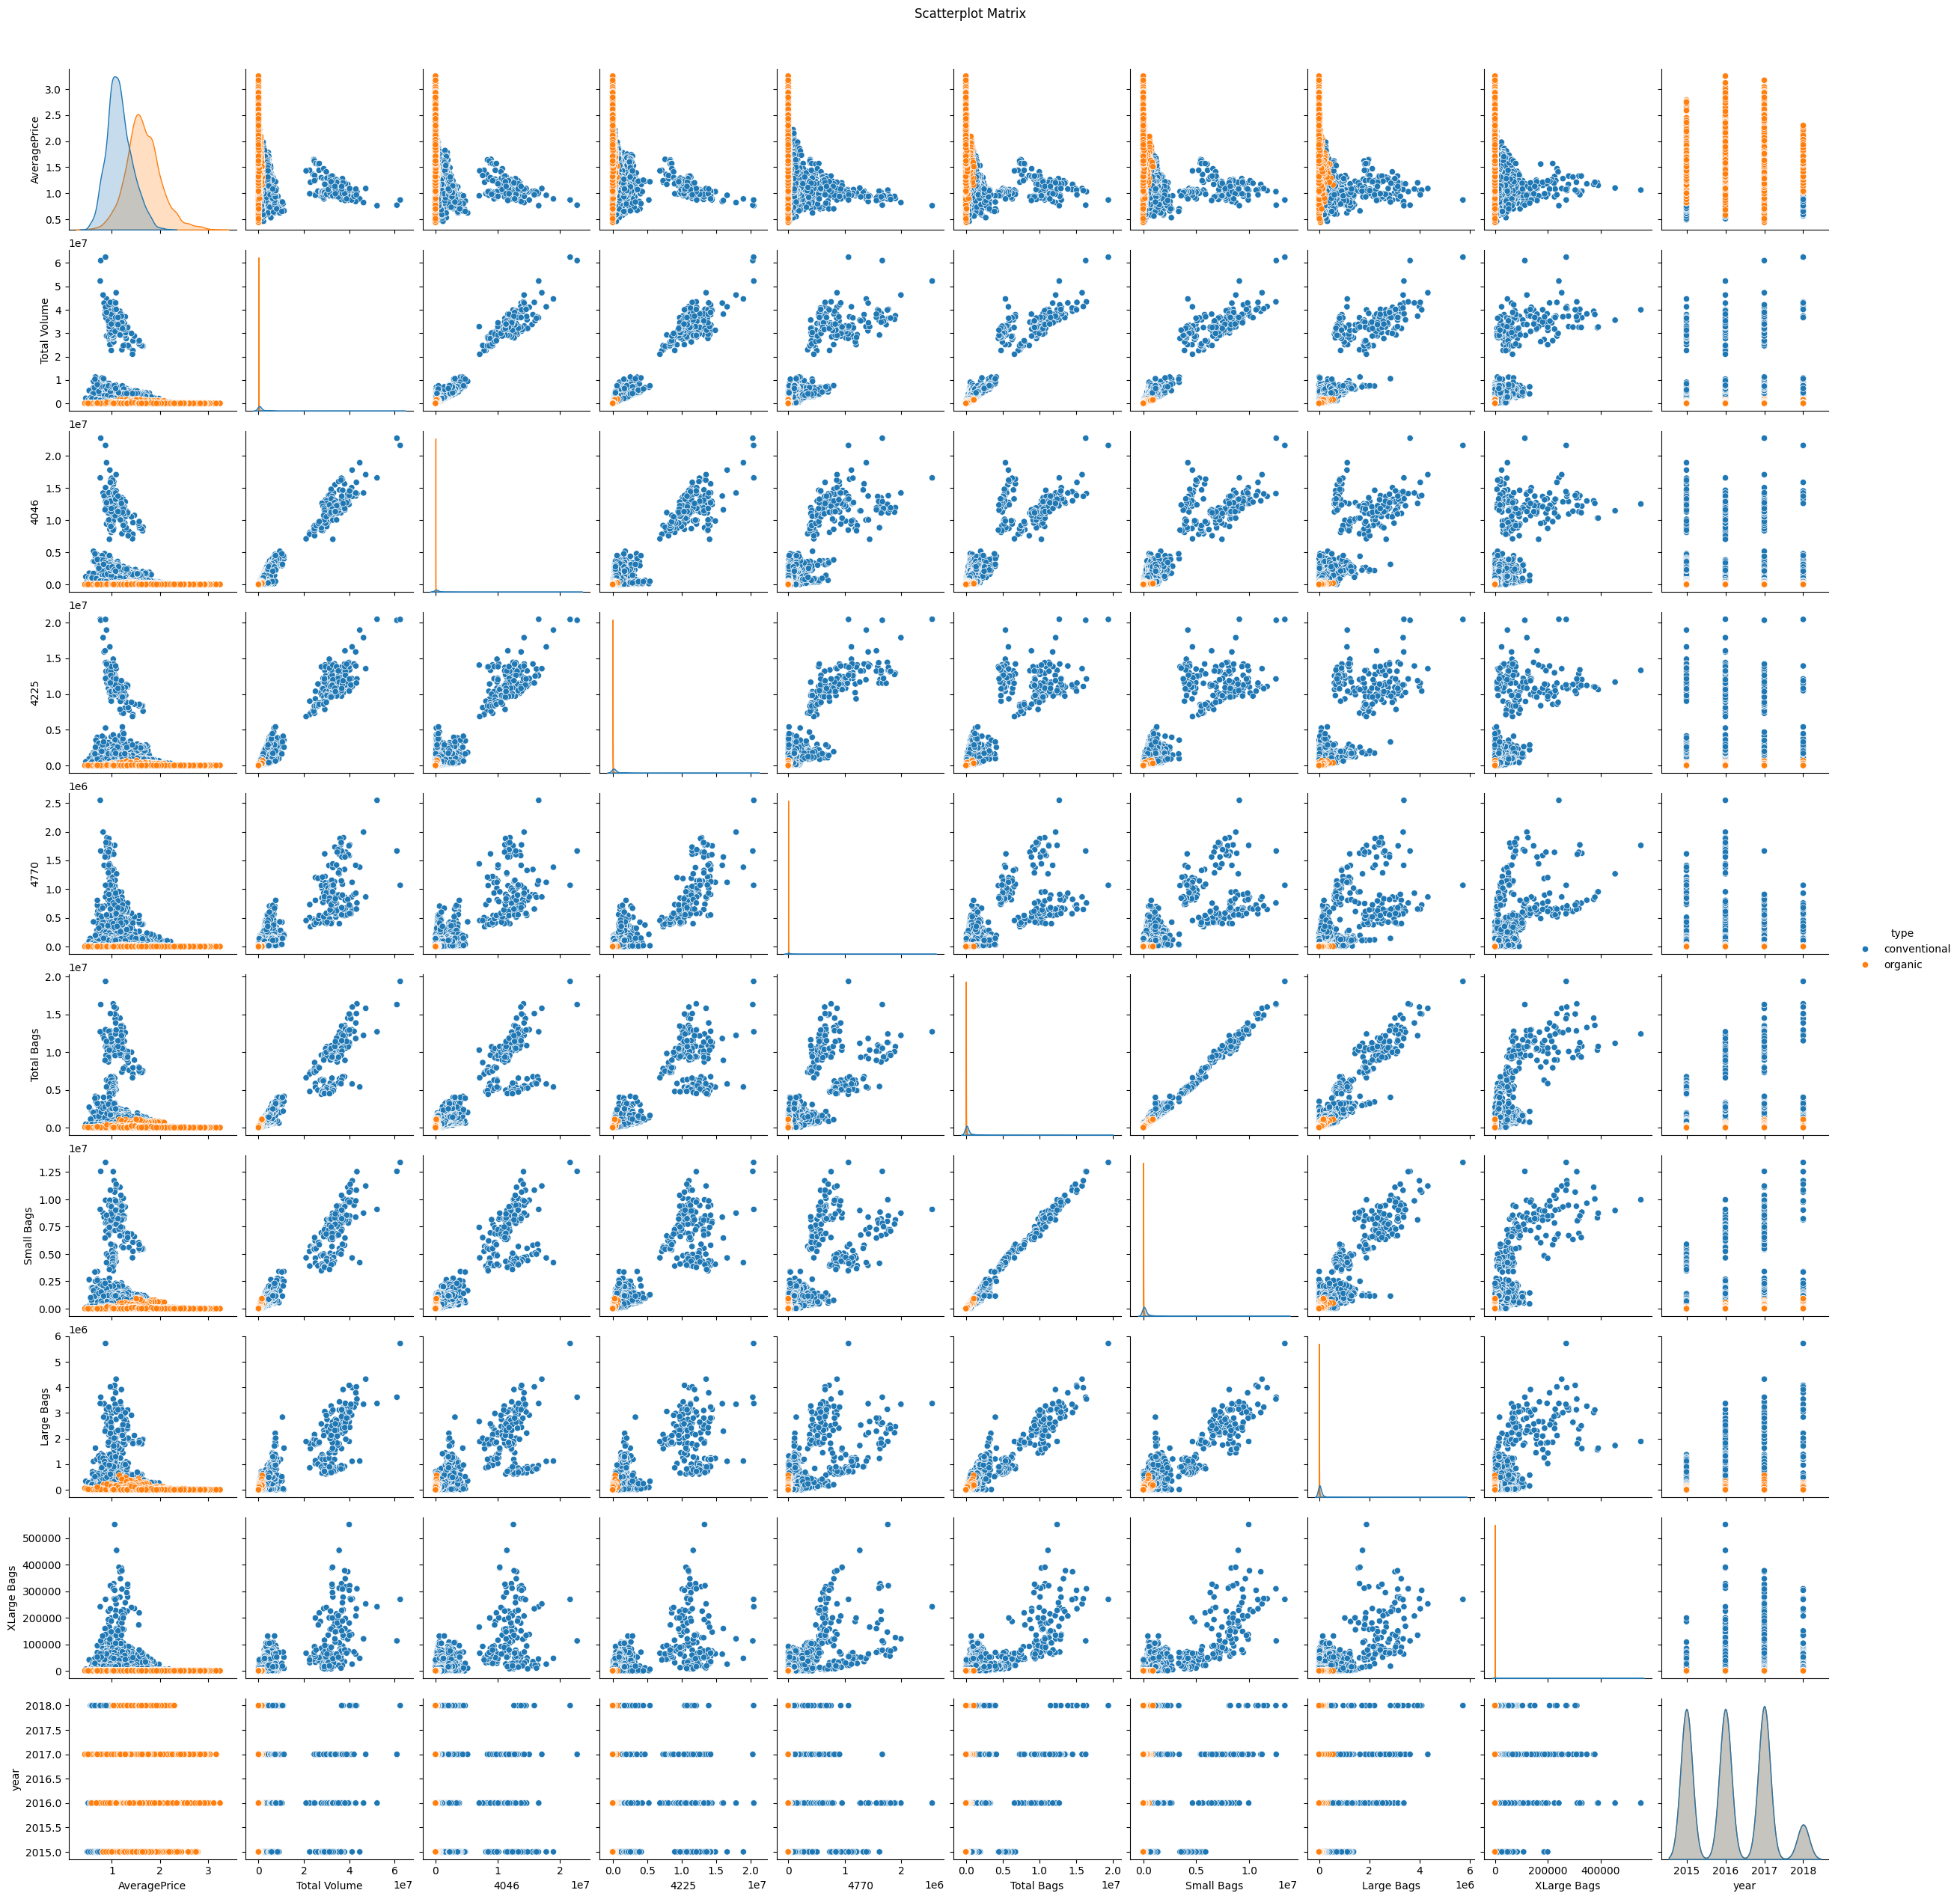

In [40]:
# Plot the scatterplot matrix
sns.pairplot(df, hue='type')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [45]:
# Plot scatterplot of AveragePrice and Total Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='region')
plt.title('Scatterplot of Average Price vs Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.legend(title='Type')
plt.show()

In [47]:
df[df['Total Volume'] > 2e7]['region'].unique()

array(['TotalUS'], dtype=object)

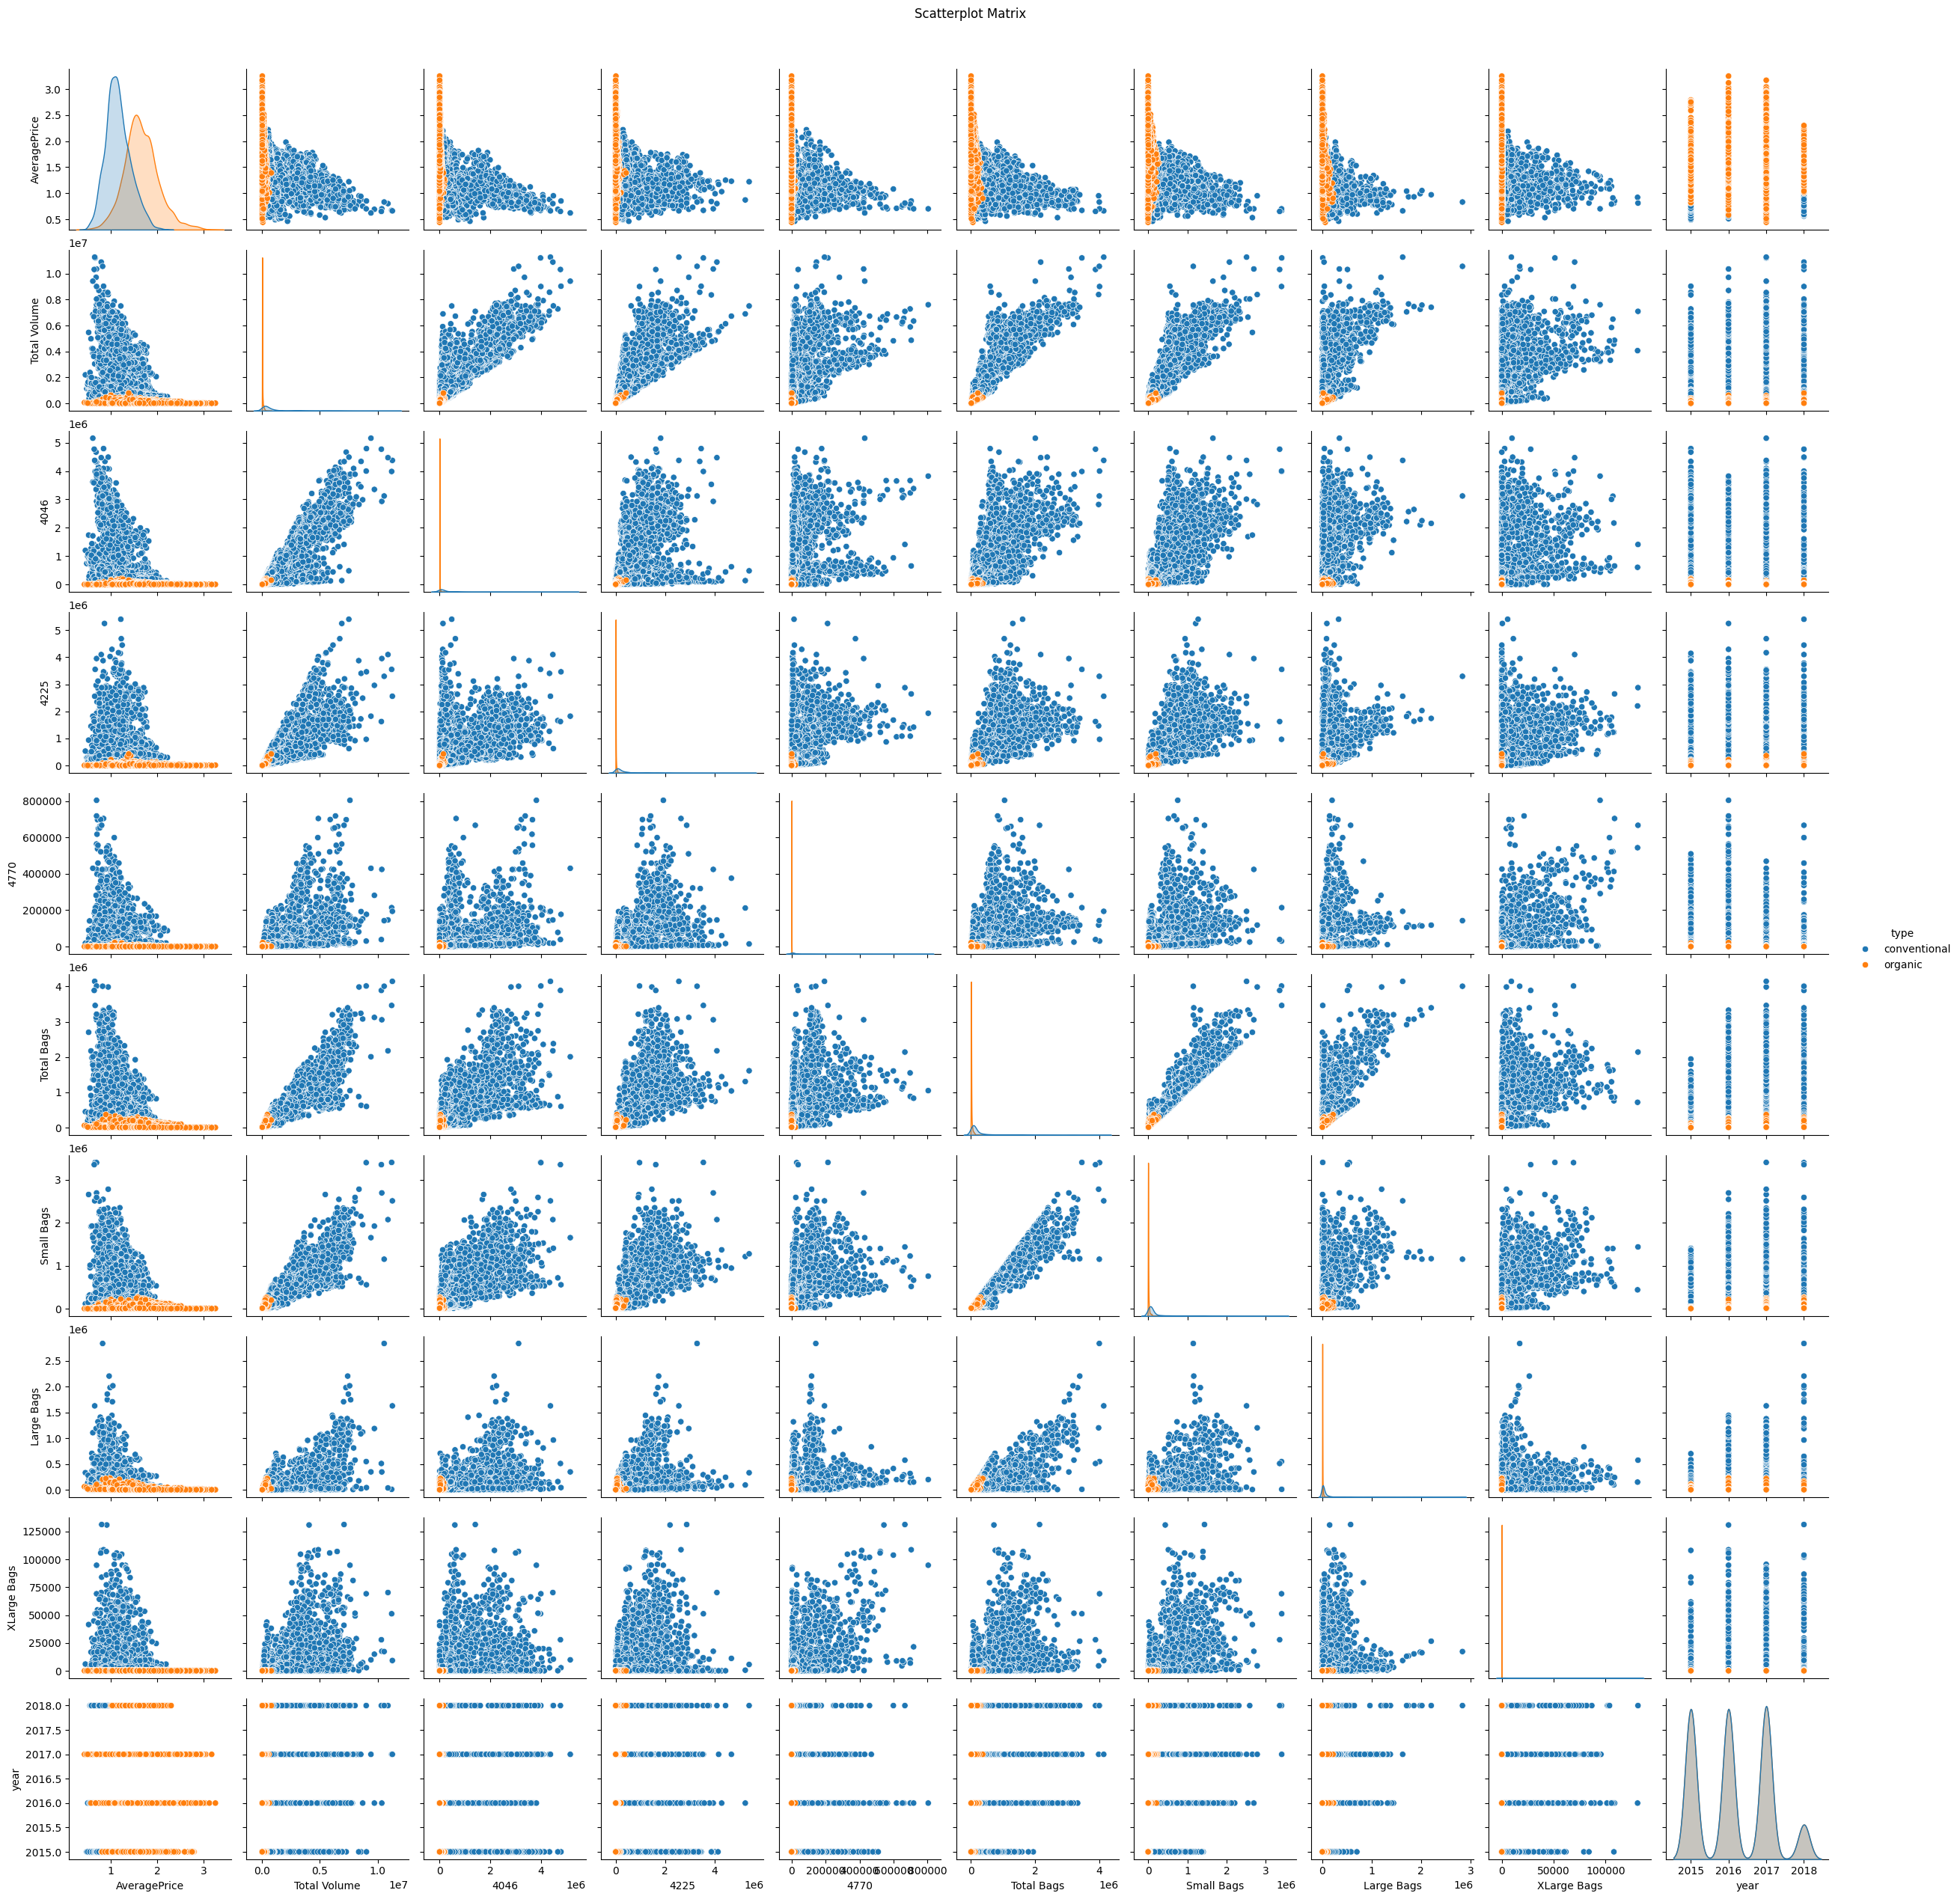

In [ ]:
# There is some strange clustering in the data, 
# investigating further we get that the totalUS region is quite different
# Excluding it we get a more uniform distribution

sns.pairplot(df[df['region'] != 'TotalUS'], hue='type')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [23]:
# Check correlations between numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Format tests

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import seaborn as sns
import kagglehub
import xgboost as xgb

# Download latest version
path = kagglehub.dataset_download("neuromusic/avocado-prices")

destination_folder = "./data"
# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move all files from source to destination
for filename in os.listdir(path):
    source_file = os.path.join(path, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.move(source_file, destination_file)

df = pd.read_csv('data/avocado.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns = 'Unnamed: 0')
df.rename(columns={'region':'Region', 'Total Volume':'TotalVolume'}, inplace=True)

In [ ]:
# df = df[['Date', 'AveragePrice', 'TotalVolume', 'type', 'Region']]

In [ ]:
def aggregate_types(group):
    total_volume = group['TotalVolume'].sum()
    # organics = group[group['type'] == 'organic']
    # conventionals = group[group['type'] == 'conventional']
    weighted_avg = (group['AveragePrice'] * group['TotalVolume']).sum() / total_volume
    return pd.Series({
        'Date': group['Date'].iloc[0],
        'Region': group['Region'].iloc[0],
        'combined_AveragePrice': weighted_avg,
        'combined_TotalVolume': total_volume,
        'combined_4046': group['4046'].sum(),
        'combined_4225': group['4225'].sum(),
        'combined_4770': group['4770'].sum(),
        'combined_TotalBags': group['TotalBags'].sum(),
        'combined_SmallBags': group['SmallBags'].sum(),
        'combined_LargeBags': group['LargeBags'].sum(),
        'combined_XLargeBags': group['XLargeBags'].sum(),
        # 'organic_AveragePrice': organics['AveragePrice'].mean(),
        # 'organic_TotalVolume': organics['TotalVolume'].sum(),
        # 'organic_4046': organics['4046'].sum(),
        # 'organic_4225': organics['4225'].sum(),
        # 'organic_4770': organics['4770'].sum(),
        # 'organic_TotalBags': organics['TotalBags'].sum(),
        # 'organic_SmallBags': organics['SmallBags'].sum(),
        # 'organic_LargeBags': organics['LargeBags'].sum(),
        # 'organic_XLargeBags': organics['XLargeBags'].sum(),
        # 'conventional_AveragePrice': conventionals['AveragePrice'].mean(),
        # 'conventional_TotalVolume': conventionals['TotalVolume'].sum(),
        # 'conventional_4046': conventionals['4046'].sum(),
        # 'conventional_4225': conventionals['4225'].sum(),
        # 'conventional_4770': conventionals['4770'].sum(),
        # 'conventional_TotalBags': conventionals['TotalBags'].sum(),
        # 'conventional_SmallBags': conventionals['SmallBags'].sum(),
        # 'conventional_LargeBags': conventionals['LargeBags'].sum(),
        # 'conventional_XLargeBags': conventionals['XLargeBags'].sum(),
    })

def group_by_region(df):
    combined_df = df.groupby(['Date', 'Region'])[df.columns].apply(aggregate_types).reset_index(drop=True)
    return combined_df


In [47]:
g_df = group_by_region(df)

In [48]:
g_df

Date               Region  combined_AveragePrice  \
0    2015-01-04               Albany               1.238537   
1    2015-01-04              Atlanta               1.006661   
2    2015-01-04  BaltimoreWashington               1.084979   
3    2015-01-04                Boise               1.021629   
4    2015-01-04               Boston               1.023595   
...         ...                  ...                    ...   
9121 2018-03-25             Syracuse               1.334537   
9122 2018-03-25                Tampa               1.331674   
9123 2018-03-25              TotalUS               1.048038   
9124 2018-03-25                 West               0.952932   
9125 2018-03-25     WestTexNewMexico               0.852174   

      combined_TotalVolume  
0                 42247.23  
1                438868.18  
2                807162.34  
3                 81539.44  
4                493930.13  
...                    ...  
9121             108464.95  
9122             479329.23  
9123           44969802.95  
9124            7938787.54  
9125             980488.46  

[9126 rows x 4 columns]

In [50]:
df = df.sort_values(["Region", "Date"])

# Pivot the data to get one row per Date and Region with separate TotalSales columns for each type.
pivot = df.pivot_table(index=["Date", "Region"], columns="type", values="TotalVolume").reset_index()
pivot = pivot.rename(columns={'organic': 'TotalVolume_Organic', 'conventional': 'TotalVolume_Conventional'})

In [52]:
# Compute lag features on the pivoted data
pivot["organic_lag"] = pivot["TotalVolume_Organic"].shift(1)
pivot["conventional_lag"] = pivot["TotalVolume_Conventional"].shift(1)

# Merge these lag features back to the original dataframe
# df = pd.merge(df, pivot[["Date", "Region", "organic_lag", "conventional_lag"]], on=["Date", "Region"], how="left")

In [53]:
pivot

type       Date               Region  TotalVolume_Conventional  \
0    2015-01-04               Albany                  40873.28   
1    2015-01-04              Atlanta                 435021.49   
2    2015-01-04  BaltimoreWashington                 788025.06   
3    2015-01-04                Boise                  80034.32   
4    2015-01-04               Boston                 491738.00   
...         ...                  ...                       ...   
9121 2018-03-25             Syracuse                  93961.48   
9122 2018-03-25                Tampa                 469300.74   
9123 2018-03-25              TotalUS               43409835.75   
9124 2018-03-25                 West                7667064.46   
9125 2018-03-25     WestTexNewMexico                 965185.06   

type  TotalVolume_Organic  organic_lag  conventional_lag  
0                 1373.95          NaN               NaN  
1                 3846.69      1373.95          40873.28  
2                19137.28      3846.69         435021.49  
3                 1505.12     19137.28         788025.06  
4                 2192.13      1505.12          80034.32  
...                   ...          ...               ...  
9121             14503.47      8210.37         165209.29  
9122             10028.49     14503.47          93961.48  
9123           1559967.20     10028.49         469300.74  
9124            271723.08   1559967.20       43409835.75  
9125             15303.40    271723.08        7667064.46  

[9126 rows x 6 columns]